In [1]:
import numpy as np
from matplotlib import pyplot as plt
from typing import Tuple, Mapping

In [2]:
!pip install ipympl 

In [3]:
%matplotlib ipympl
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.ioff()
a = np.arange(-10,10,0.1)
b = np.arange(-10,10,0.1)
xgrid, ygrid = np.meshgrid(a, b)

'''
Функция Бута
'''

def func_but(x, y):
    return (x + 2 * y - 7) * (x + 2 * y - 7) + (2 * x + y - 5) * (2 * x + y - 5) # исходная функция 

def dx_but(x, y):
    return 10 * x + 8 * y - 34 # производная по х

def dy_but(x, y):
    return 10 * y + 8 * x - 38 # производня по у

'''
Функция МакКормика
'''

def func_korm(x, y):
    return np.sin(x + y) + (x - y) * (x - y) - 1.5 * x + 2.5 * y + 1 # исходная функция 

def dx_korm(x, y):
    return np.cos(x + y) + 2 * x - 2 * y - 1.5 # производная по х

def dy_korm(x, y):
    return np.cos(y + x) + 2 * y - 2 * x + 2.5 # производня по у


'''
Функция Химмельблау
'''

def func_him(x, y):
    return (x * x  + y - 11) * (x * x  + y - 11) + (x + y * y - 7) * (x + y * y - 7) # исходная функция 

def dx_him(x, y):
    return 4 * x * x * x + x * (4 * y - 42) + 2 * y * y - 14 # производная по х

def dy_him(x, y):
    return 4 * y * y * y + y * (4 * x - 26) + 2 * x * x - 22 # производня по у

In [4]:
'''
Реализация шедулера
'''

class lr_scheduler():
    def __init__(self, step_size:int=5000, gamma:float=0.1, lr:float=0.1):
        '''
        step_size -- количество итераций необходимое для уменьшения скорости обучения
        gamma -- коэффициент на который домнажается скорость обучеия каждые step_size шагов
        lr -- скорость обучения
        '''
        self.iter  = 0 # переменная для подсчета шагов
        self.step_size = step_size
        self.gamma = gamma
        self.lr = lr

    def step(self):
        self.iter += 1
        if self.iter == self.step_size: # когда число итераций становится равно заданному порогу -> уменьшаем скорость обучения
            self.lr = self.lr * self.gamma
            self.iter = 0
        return self.lr

In [5]:
def GD(f:Mapping, dx:Mapping, dy:Mapping, x0:np.ndarray, y0:np.ndarray, lr_start:float=0.001, iter=100, thr:float=None):
    '''
        f -- исходная функция
        dx -- производня по х от исходной функции
        dy -- производня по у от исходной функции
        x0 -- стартовая точка по координате х
        y0 -- стартовая точка по координате у
        lr_start -- изначальное значение скорости обучения
        iter -- число итераций выполнения алгоритма
        thr -- точность вычислений 
    '''
    
    zgrid = f(xgrid,ygrid)

    fig = plt.figure(figsize=(7, 4))

    ax_3d = Axes3D(fig, auto_add_to_figure=True)

    ax_3d.plot_surface(xgrid, ygrid, zgrid, cmap='plasma', alpha=0.5)

    ax_3d.set_xlabel('x')
    ax_3d.set_ylabel('y')
    ax_3d.set_zlabel('f')
    
    x_old = x0.copy()
    y_old = y0.copy()
    
    
    scheduler = lr_scheduler(lr=lr_start)
    for i in range(iter):
        if np.linalg.norm(dx(x_old, y_old)) > thr and np.linalg.norm(dy(x_old, y_old)) > thr:
            gradX = dx(x_old, y_old)
            gradY = dy(x_old, y_old)
            x_old = x_old - scheduler.lr * gradX
            y_old = y_old - scheduler.lr * gradY
            scheduler.step()
            ax_3d.scatter(x_old, y_old, f(x_old, y_old), c='red')
    plt.show()
    return x_old, y_old

In [6]:
def SGD(f:Mapping, dx:Mapping, dy:Mapping, x0:np.ndarray, y0:np.ndarray, lr_start:float=0.1, iter=100, thr:float=None, momentum:float=0.9):
    '''
        f -- исходная функция
        dx -- производня по х от исходной функции
        dy -- производня по у от исходной функции
        x0 -- стартовая точка по координате х
        y0 -- стартовая точка по координате у
        lr_start -- изначальное значение скорости обучения
        iter -- число итераций выполнения алгоритма
        thr -- точность вычислений 
    '''
    
    zgrid = f(xgrid,ygrid)

    fig = plt.figure(figsize=(7, 4))

    ax_3d = Axes3D(fig, auto_add_to_figure=True)

    ax_3d.plot_surface(xgrid, ygrid, zgrid, cmap='plasma', alpha=0.5)

    ax_3d.set_xlabel('x')
    ax_3d.set_ylabel('y')
    ax_3d.set_zlabel('f')
    
    x_old = x0.copy()
    y_old = y0.copy()
    scheduler = lr_scheduler(lr=lr_start)
    gx = 0
    gy = 0
    for i in range(iter):
        if np.linalg.norm(dx(x_old, y_old)) > thr and np.linalg.norm(dy(x_old, y_old)) > thr:
            gradX = dx(x_old, y_old)
            gradY = dy(x_old, y_old)
            if i == 1:
                gx = gradX
                gy = gradY
            else:
                gx = gradX + momentum * gx
                gy = gradY + momentum * gy
            x_old = x_old - scheduler.lr * gx
            y_old = y_old - scheduler.lr * gy
            scheduler.step()
            ax_3d.scatter(x_old, y_old, f(x_old, y_old), c='red')
    plt.show()
    return x_old, y_old

In [7]:
def ADAGRAD(f:Mapping, dx:Mapping, dy:Mapping, x0:np.ndarray, y0:np.ndarray, lr_start:float=0.1, iter=100, thr:float=None, momentum:float=0.9):
    '''
        f -- исходная функция
        dx -- производня по х от исходной функции
        dy -- производня по у от исходной функции
        x0 -- стартовая точка по координате х
        y0 -- стартовая точка по координате у
        lr_start -- изначальное значение скорости обучения
        iter -- число итераций выполнения алгоритма
        thr -- точность вычислений 
    '''
    
    zgrid = f(xgrid,ygrid)

    fig = plt.figure(figsize=(7, 4))

    ax_3d = Axes3D(fig, auto_add_to_figure=True)

    ax_3d.plot_surface(xgrid, ygrid, zgrid, cmap='plasma', alpha=0.5)

    ax_3d.set_xlabel('x')
    ax_3d.set_ylabel('y')
    ax_3d.set_zlabel('f')
    x_old = x0.copy()
    y_old = y0.copy()
    scheduler = lr_scheduler(step_size=10000 ,lr=lr_start)
    s_sum_x = 0
    s_sum_y = 0
    for i in range(iter):
        if np.linalg.norm(dx(x_old, y_old)) > thr and np.linalg.norm(dy(x_old, y_old)) > thr:
            gradX = dx(x_old, y_old)
            gradY = dy(x_old, y_old)
            s_sum_x = s_sum_x + gradX ** 2
            s_sum_y = s_sum_y + gradY ** 2
            x_old = x_old - scheduler.lr * gradX / (s_sum_x ** 0.5)
            y_old = y_old - scheduler.lr * gradY / (s_sum_y ** 0.5)
            scheduler.step()
            ax_3d.scatter(x_old, y_old, f(x_old, y_old), c='red')
    plt.show()
    return x_old, y_old

### Тестирование функции Бута

In [19]:
a = np.arange(-10,10,0.1)
b = np.arange(-10,10,0.1)
xgrid, ygrid = np.meshgrid(a, b)

In [20]:
x, y = GD(f=func_but, dx=dx_but, dy=dy_but, x0=np.array([-1]), y0=np.array([-1]), iter=100, thr=10)
print(x, y)
func_but(x, y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[1.20290531] [1.51586288]


array([8.81005334])

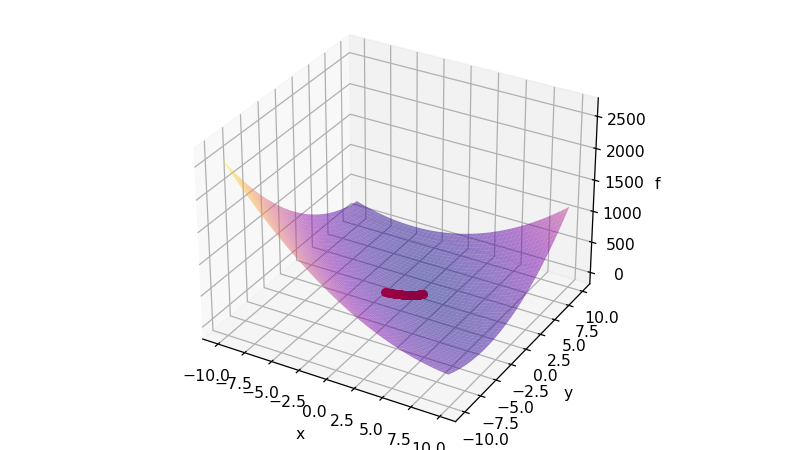

In [21]:
x, y = SGD(f=func_but, dx=dx_but, dy=dy_but, x0=np.array([-1]), y0=np.array([-1]), iter=100, thr=10)
print(x, y)
func_but(x, y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[0.27105442] [2.70976898]


array([4.77047946])

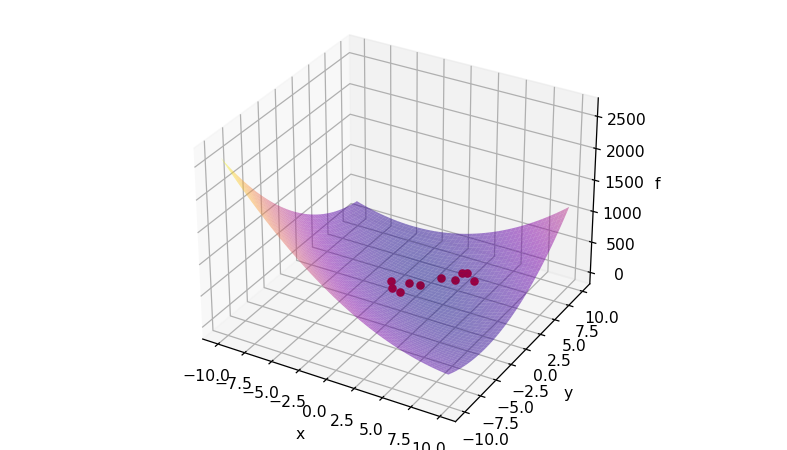

In [22]:
x, y = ADAGRAD(f=func_but, dx=dx_but, dy=dy_but, x0=np.array([-1]), y0=np.array([-1]), iter=100, thr=10)
print(x, y)
func_but(x, y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[0.59177501] [0.61719018]


array([37.00393155])

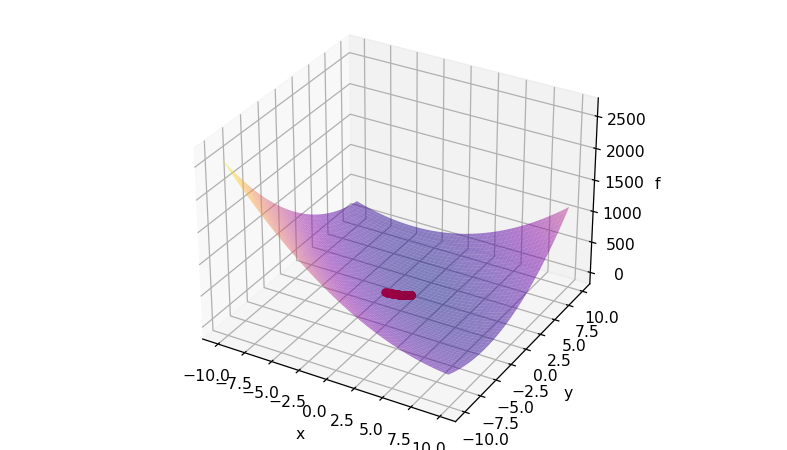

### Тестирование функции МакКормика

In [23]:
a = np.arange(-3/2,4,0.1)
b = np.arange(-3,4,0.1)
xgrid, ygrid = np.meshgrid(a, b)

In [24]:
x, y = GD(f=func_korm, dx=dx_korm, dy=dy_korm, x0=np.array([-1.5]), y0=np.array([4]), iter=1000, thr=1e-10)
print(x, y)
func_korm(x, y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[2.13072954] [1.24883005]


array([1.46800018])

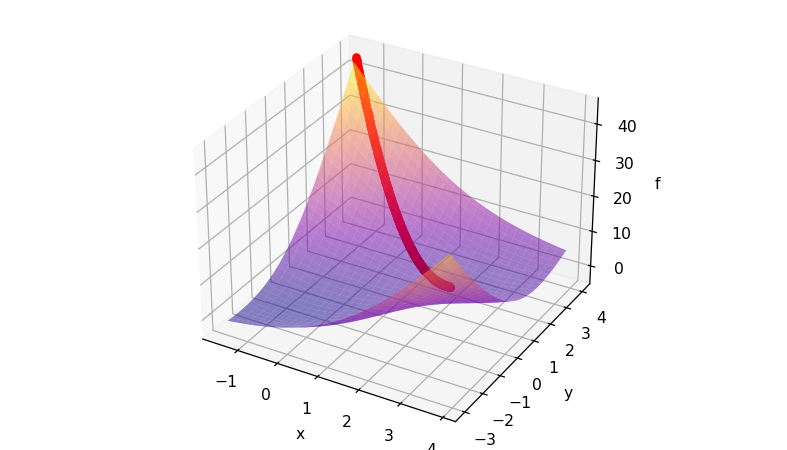

In [25]:
x, y = SGD(f=func_korm, dx=dx_korm, dy=dy_korm, x0=np.array([-1.5]), y0=np.array([4]), lr_start=0.1, iter=10000, thr=1e-10)
print(x, y)
func_korm(x, y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[2.5943951] [1.5943951]


array([1.2283697])

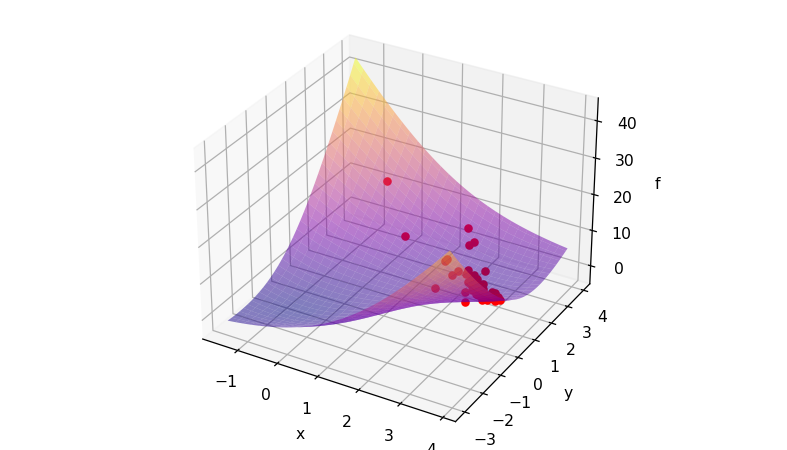

In [26]:
x, y = ADAGRAD(f=func_korm, dx=dx_korm, dy=dy_korm, x0=np.array([-1.5]), y0=np.array([4]), iter=1000, thr=1e-10)
print(x, y)
func_korm(x, y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[1.94204673] [1.07915417]


array([1.64950004])

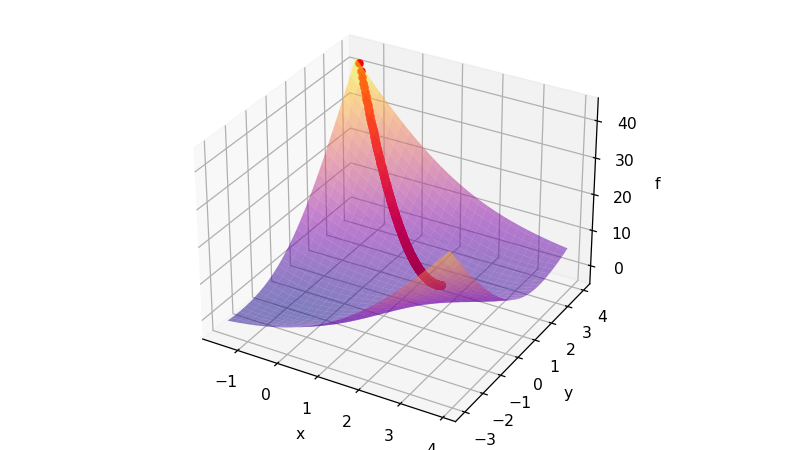

### Тестирование функции Химмельблау

In [27]:
a = np.arange(-5,5,0.1)
b = np.arange(-5,5,0.1)
xgrid, ygrid = np.meshgrid(a, b)

In [28]:
x, y = GD(f=func_him, dx=dx_him, dy=dy_him, x0=np.array([-5]), y0=np.array([5]), iter=20000, thr=10)
print(x, y)
func_him(x, y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[-2.98078782] [3.24652946]


array([1.59324253])

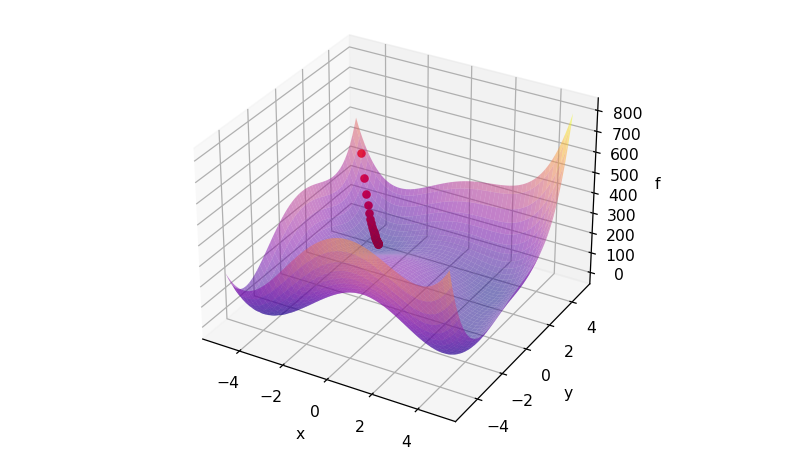

In [29]:
x, y = ADAGRAD(f=func_him, dx=dx_him, dy=dy_him, x0=np.array([5]), y0=np.array([5]), iter=2000, thr=10)
print(x, y)
func_him(x, y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[2.95204906] [2.63829355]


array([8.60801241])

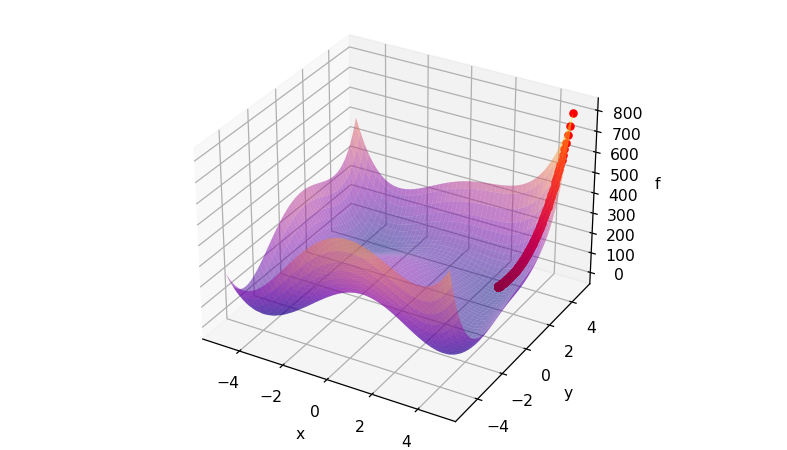